<a href="https://colab.research.google.com/github/NaveedDB7/EDAcourseproj/blob/main/EDAproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Data loaded
Shape: (1319, 13)
   rownames card  reports       age  income     share  expenditure owner  \
0         1  yes        0  37.66667  4.5200  0.033270   124.983300   yes   
1         2  yes        0  33.25000  2.4200  0.005217     9.854167    no   
2         3  yes        0  33.66667  4.5000  0.004156    15.000000   yes   
3         4  yes        0  30.50000  2.5400  0.065214   137.869200    no   
4         5  yes        0  32.16667  9.7867  0.067051   546.503300   yes   

  selfemp  dependents  months  majorcards  active  
0      no           3      54           1      12  
1      no           3      34           1      13  
2      no           4      58           1       5  
3      no           0      25           1       7  
4      no           2      64           1       5  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 

/tmp/ipython-input-2584332814.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")



Data types:
rownames         int64
card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object
Numeric: ['rownames', 'reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
Categorical: ['card', 'owner', 'selfemp']


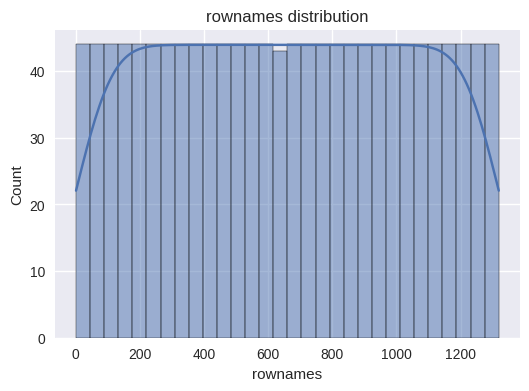

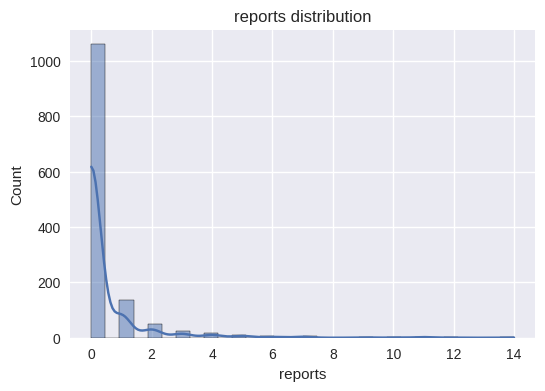

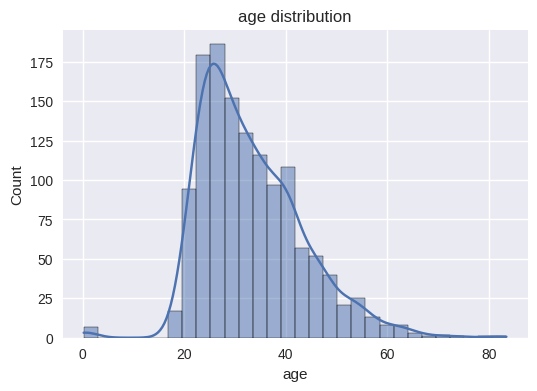

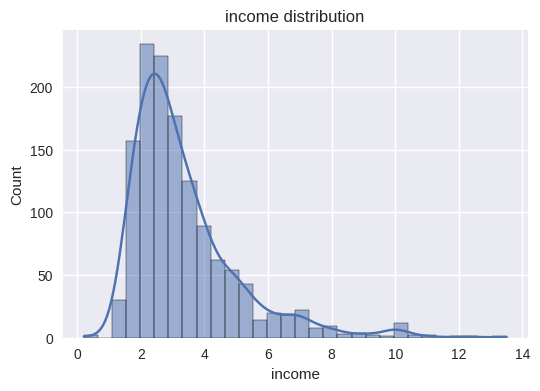

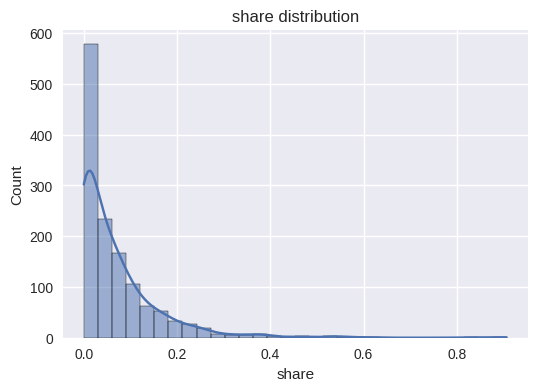

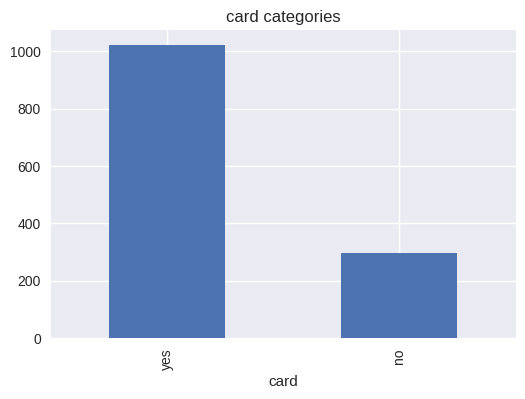

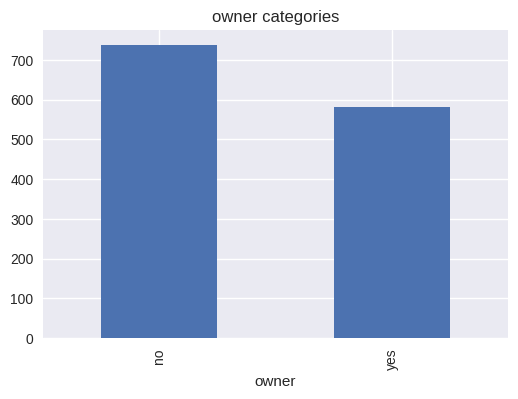

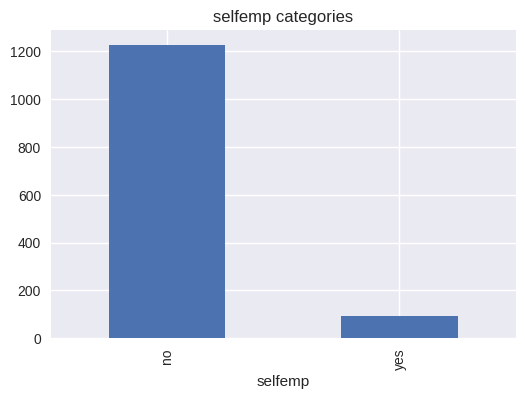

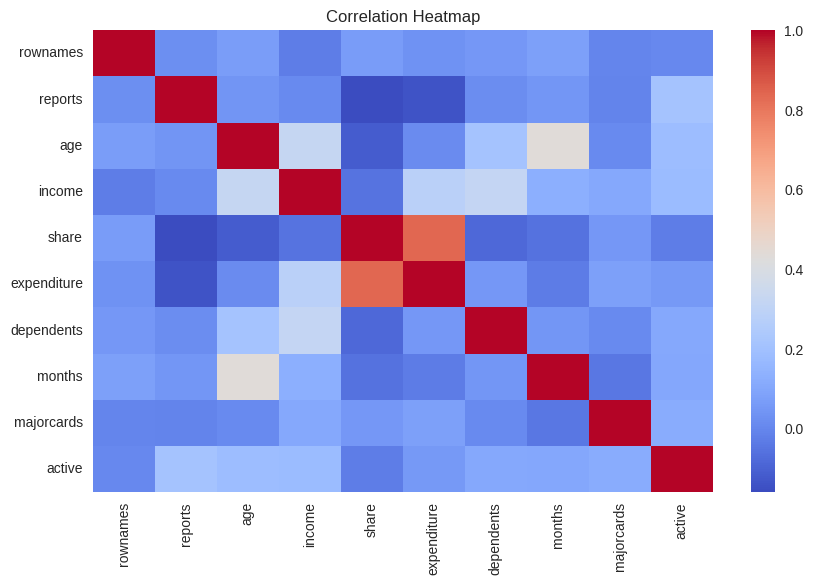

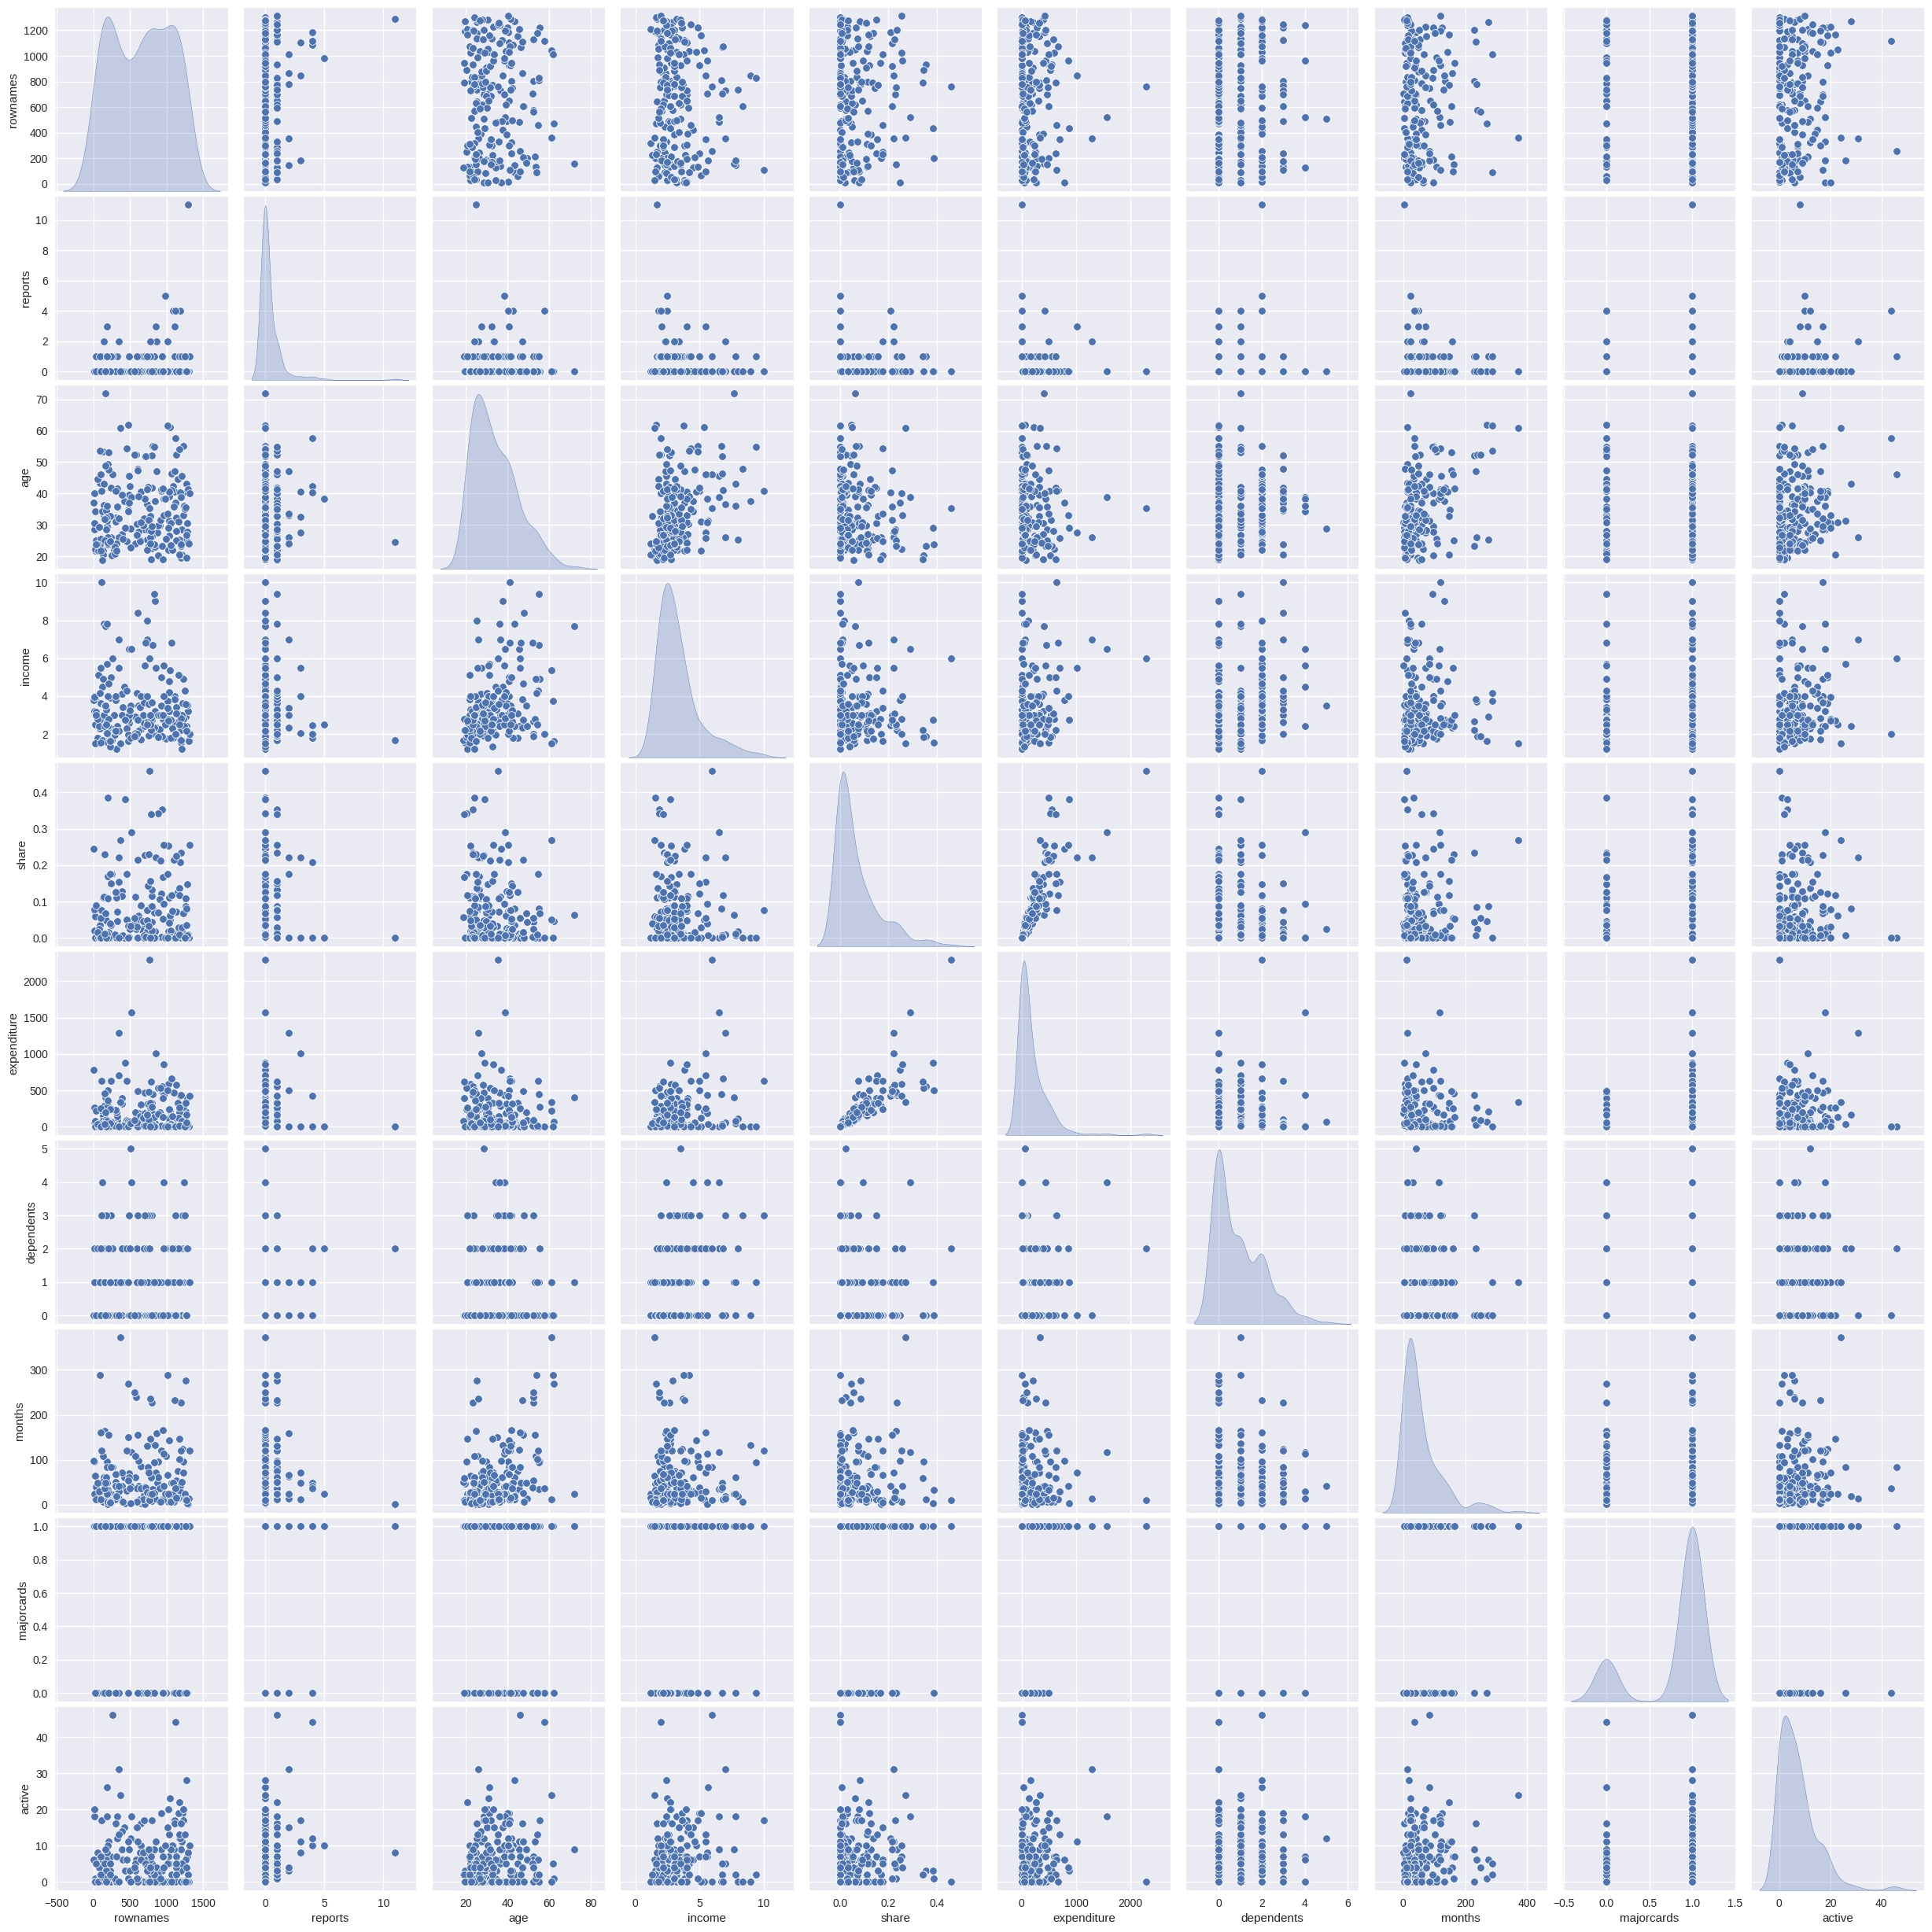


✅ Final shape: (1319, 13)


In [1]:
# Naveed Noushad (22BDS0083)
# BCSE331L - Exploratory Data Analysis
# Dataset: CreditCard.csv


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# 1. Load data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/CreditCard.csv"
df = pd.read_csv(url)

print("✅ Data loaded")
print("Shape:", df.shape)
print(df.head())

# 2. Basic info
print("\nInfo:")
print(df.info())

print("\nSummary (numeric):")
print(df.describe())

print("\nSummary (categorical):")
print(df.describe(include="object"))

# 3. Data quality
print("\nMissing values:")
print(df.isnull().sum())

print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
df = df.fillna(method="ffill")

# 4. Data types
print("\nData types:")
print(df.dtypes)

num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

# 5. Univariate analysis
for col in num_cols[:5]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} distribution")
    plt.show()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"{col} categories")
    plt.show()

# 6. Bivariate analysis
if "Amount" in df.columns and "Class" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Class", y="Amount", data=df)
    plt.title("Amount by Class")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.scatterplot(x="Amount", y="Class", data=df, alpha=0.5)
    plt.title("Amount vs Class")
    plt.show()

# 7. Correlation
corr = df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# 8. Multivariate
sns.pairplot(df.sample(min(200, len(df))), diag_kind="kde")
plt.show()

# 9. Time column
if "Time" in df.columns:
    df["Time"] = pd.to_datetime(df["Time"], errors="coerce", unit="s")
    df.set_index("Time", inplace=True)
    df["Amount"].resample("D").sum().plot(figsize=(12,5))
    plt.title("Daily transaction totals")
    plt.show()

# 10. Contingency table
if {"Gender","Class"}.issubset(df.columns):
    print("\nGender vs Class")
    print(pd.crosstab(df["Gender"], df["Class"]))

# 11. Final
print("\n✅ Final shape:", df.shape)